<a href="https://colab.research.google.com/github/SnehaVasishth/placement_prediction_model/blob/main/Placement_predictionmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/content/placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.shape


(100, 4)

In [5]:
#preprocessing

In [7]:
df=df.iloc[:,1:]

In [9]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [11]:
#column does not contain any null value

In [12]:
import matplotlib.pyplot as plt


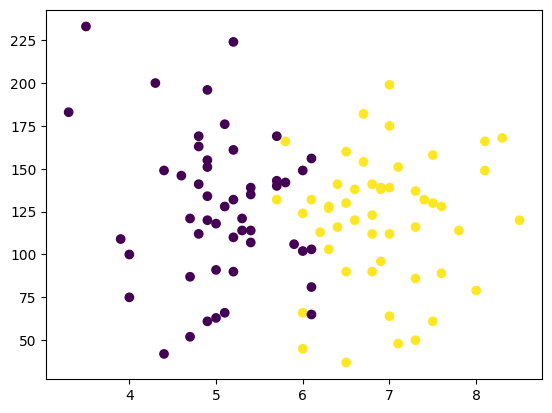

In [14]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [15]:
# eda: our data is linear an demand classficatio thus using logestic regreesion

In [16]:
X=df.iloc[:,0:2]

In [17]:
y=df.iloc[:,2:3]

In [18]:
X


,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [19]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [21]:
x_train


,cgpa,iq
79,6.5,90.0
25,5.0,91.0
65,8.1,166.0
27,6.0,124.0
44,7.5,61.0
...,...,...
50,3.5,233.0
7,5.0,63.0
93,6.8,112.0
90,7.3,86.0


In [22]:
y_train

,placement
79,1
25,0
65,1
27,1
44,1
...,...
50,0
7,0
93,1
90,1


In [23]:
#scale

In [24]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler=StandardScaler()   # brings value between -1 to 1

In [29]:
x_train=scaler.fit_transform(x_train)

In [30]:
x_train

array([[ 0.41387298, -0.85370796],
       [-0.89462474, -0.82906597],
       [ 1.80960389,  1.01908307],
       [-0.02229292, -0.01588039],
       [ 1.2862048 , -1.56832559],
       [-0.19675929,  1.01908307],
       [ 2.15853661, -0.11444834],
       [ 0.41387298,  0.13197153],
       [-0.28399247,  0.45231737],
       [ 0.67557253, -0.85370796],
       [ 0.76280571,  0.32910743],
       [-0.54569201,  0.25518147],
       [ 0.50110617, -0.11444834],
       [ 0.23940662, -0.53336212],
       [-0.02229292, -1.44511565],
       [-1.41802383, -2.03652335],
       [ 1.37343798, -0.87834995],
       [-0.98185792,  1.75834269],
       [-0.54569201,  0.35374942],
       [ 1.11173844, -1.83938745],
       [-0.98185792, -1.56832559],
       [-0.6329252 , -0.08980635],
       [ 0.3266398 , -0.21301629],
       [ 1.2862048 ,  0.82194718],
       [-1.76695656, -0.60728809],
       [-2.37758883,  1.43799686],
       [ 0.41387298, -2.15973328],
       [-1.0690911 ,  0.40303339],
       [ 1.37343798,

In [32]:
x_test=scaler.fit_transform(x_test)

In [33]:
x_test

array([[ 4.17172805e-01,  6.09417157e-01],
       [ 2.10572940e+00, -4.81129926e-16],
       [ 5.16499663e-01, -3.38565087e-02],
       [-6.75422637e-01,  1.35426035e-01],
       [-9.73403211e-01, -2.09910354e+00],
       [-4.76768920e-01, -8.12556209e-01],
       [-9.73403211e-01, -9.14125735e-01],
       [-7.74749495e-01,  6.77130174e-01],
       [-4.76768920e-01,  1.59125591e+00],
       [ 1.31111453e+00,  8.46412718e-01]])

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
clf=LogisticRegression()

In [42]:
y_train=np.ravel(y_train)

In [43]:
clf.fit(x_train,y_train)

LogisticRegression()

In [46]:
y_pred=clf.predict(x_test)

In [47]:
y_test

,placement
55,1
38,1
82,1
21,1
47,0
10,1
68,0
31,0
61,1
45,1


In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_test,y_pred)

0.8

In [50]:
type(y_train)

numpy.ndarray

In [53]:
type(x_train)

pandas.core.frame.DataFrame

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

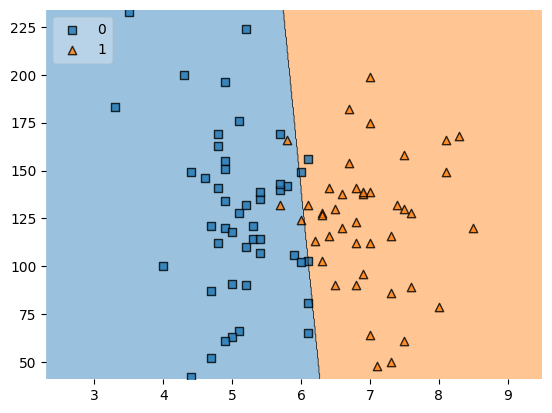

In [54]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train.values,y_train,clf=clf,legend=2)

In [55]:
import pickle

In [56]:
pickle.dump(clf,open('model.pkl','wb'))